# Juan C. S. Herrera

# Taste does not endure

## 0. Import Packages

In [1]:
#!pip install --upgrade pip
#!pip install pybind11
#!pip install --upgrade cpalgorithm
#!pip install networkx
#!pip install --upgrade networkx
#!pip install --upgrade pandas
#!pip install --upgrade scikit
#!pip install --upgrade matplotlib
#!pip install --upgrade networkx
#!pip install --upgrade scikit-learn
#!pip install node2vec
#!pip install karateclub
#!pip install networkx
#%matplotlib inline

In [2]:
#IMPORT PACKAGES
#library for data management as data frames
import pandas as pd
#for network science
import networkx as nx
from networkx.algorithms import bipartite
#plotting and visualizations
import matplotlib.pyplot as plt
#sklearn (Jaccard)
from sklearn.metrics import pairwise_distances
import numpy as np
#node2Vec for Embeddings
from node2vec import Node2Vec

import seaborn as sns

import math

## 1. Functions

I have built several network functions which are stored on a .py file named networkfunctions here I am calling this python program to obtain these functions.

In [3]:
import networkfunctions as nf

## 2. Import Data

In [4]:
# Convert to a DataFrame and render.
carrusel_df = pd.read_csv('/Users/juan/Dropbox/ACADEMICO/NYU PHD/Dissertation/paper3carrusel/Carruseldata/carrusel_working_data.csv')

#convert year, month, day to numeric variables
carrusel_df[["month", "day", "year"]] = carrusel_df[["month", "day", "year"]].apply(pd.to_numeric)

carrusel_df['key_node'] = carrusel_df.groupby(['ingredient_en']).cumcount()



#look at the first x values
carrusel_df.head(10)

,date,month,day,year,recipe_name,ingredient_en,category,key_node
0,3/18/77,3,18,1977,ensalada_rusa_3181977,potato,vegetable,0
1,3/18/77,3,18,1977,ensalada_rusa_3181977,apple,fruit,0
2,3/18/77,3,18,1977,ensalada_rusa_3181977,carrot,vegetable,0
3,3/18/77,3,18,1977,ensalada_rusa_3181977,vetch,plant,0
4,3/18/77,3,18,1977,ensalada_rusa_3181977,mayonnaise,plant derivative,0
5,3/18/77,3,18,1977,ensalada_rusa_3181977,salt,mineral,0
6,3/18/77,3,18,1977,ensalada_rusa_3181977,pepper,spice,0
7,3/18/77,3,18,1977,huevos_en_canastilla_3181977,egg,animal product,0
8,3/18/77,3,18,1977,huevos_en_canastilla_3181977,puff_pastry,cereal/crop,0
9,3/18/77,3,18,1977,huevos_en_canastilla_3181977,salad,vegetable,0


### 2.A. General Data Descriptives

Text(0, 0.5, 'Number of Recipes')

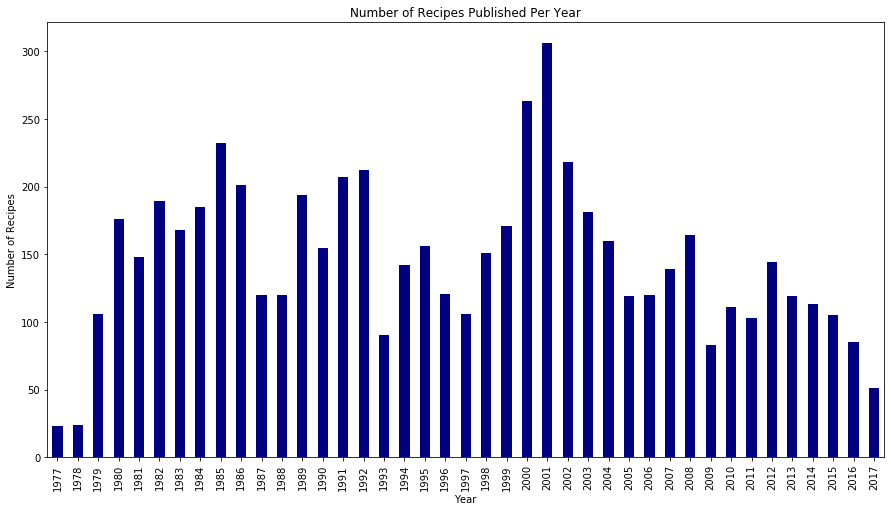

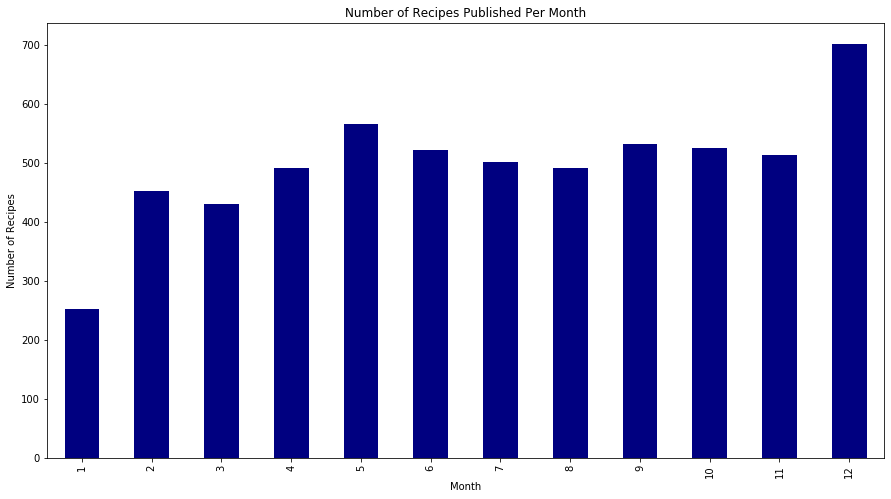

In [5]:
X = carrusel_df[['date','recipe_name']]
X = X.drop_duplicates()
X['date'] = pd.to_datetime(X['date'], errors='coerce')
X['yearly'] = X['date'].dt.year
fig, ax = plt.subplots(figsize=(15, 8))
#Label axis
#Plot
X[['yearly','recipe_name']].groupby(['yearly']).agg(['count']).plot.bar(
    ax=ax, legend=False, title="Number of Recipes Published Per Year", color = 'navy'
)
plt.xlabel("Year")
plt.ylabel("Number of Recipes")


X = carrusel_df[['date','recipe_name']]
X = X.drop_duplicates()
X['date'] = pd.to_datetime(X['date'], errors='coerce')
X['yearly'] = X['date'].dt.month
fig, ax = plt.subplots(figsize=(15, 8))
#Label axis
#Plot
X[['yearly','recipe_name']].groupby(['yearly']).agg(['count']).plot.bar(
    ax=ax, legend=False, title="Number of Recipes Published Per Month", color = 'navy'
)
plt.xlabel("Month")
plt.ylabel("Number of Recipes")


### Check one or several ingredient frequencies if needed (change the value(s)) in listofin. A example with tofu has been provided.

Text(0, 0.5, 'Number of Recipes')

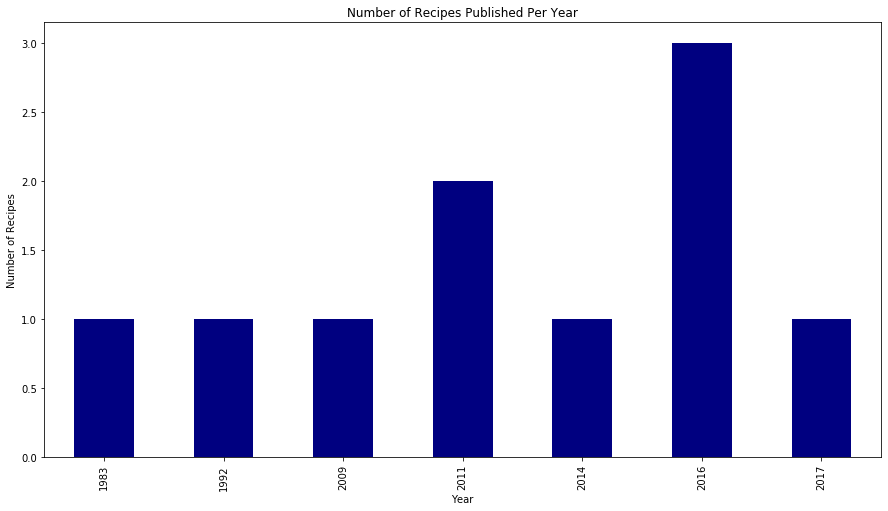

In [20]:
listofin=['tofu']

X = carrusel_df[['date','recipe_name','ingredient_en']]

X = X[X['ingredient_en'].isin(listofin)]
X = X.drop_duplicates()
X['date'] = pd.to_datetime(X['date'], errors='coerce')
X['yearly'] = X['date'].dt.year
fig, ax = plt.subplots(figsize=(15, 8))
#Label axis
#Plot
X[['yearly','recipe_name']].groupby(['yearly']).agg(['count']).plot.bar(
    ax=ax, legend=False, title="Number of Recipes Published Per Year", color = 'navy'
)
plt.xlabel("Year")
plt.ylabel("Number of Recipes")

## 3.  Create Networks

In [8]:
#load NODE data as lists. The symbols such as (' , etc were concatenated on 

nodesrecipes = list(carrusel_df.recipe_name.unique())

#nodes and edges
node_category = list(carrusel_df.recipe_name.unique())
nodesingredients = list(carrusel_df.ingredient_en.unique())
edgesrecipeingredient = list(zip(carrusel_df.recipe_name, carrusel_df.ingredient_en))

#node attributes
ingredient_category = dict(zip(carrusel_df.ingredient_en,carrusel_df.category))

#we want these statistics on the output
print("Number of Recipes:",len(nodesrecipes))
print("Number of Ingredients:",len(nodesingredients))

#keep these variables
tot_num_recipes_accu = len(nodesrecipes)
tot_num_ingredients_accu = len(nodesingredients)


#checks that there are no ingredients present in both nodesrecipes and nodeingredients
for x in nodesrecipes:
  if x in nodesingredients:
    print("WARNING: The following ingredients are listed as ingredients AND recipes: ",x)  
    
#Create Networks
import networkx as nx
#from networkx.algorithms import bipartite

#here we are creating an empty graph (network)
B = nx.Graph()

#we are adding the nodes, which we loaded on the previous step. 
#note how we add the bipartite nodes below

# 1 #BIPARTITE NETWORK
B.add_nodes_from(nodesrecipes, bipartite=0)
B.add_nodes_from(nodesingredients, bipartite=1)

#we add the edges
B.add_edges_from(edgesrecipeingredient)

#2 #PROJECTED NETWORK - WEIGHTED
G = bipartite.weighted_projected_graph(B,nodesingredients)

Number of Recipes: 5981
Number of Ingredients: 559


### 3.1. Bipartite

##### Let's plot both a bipartite and a projected network

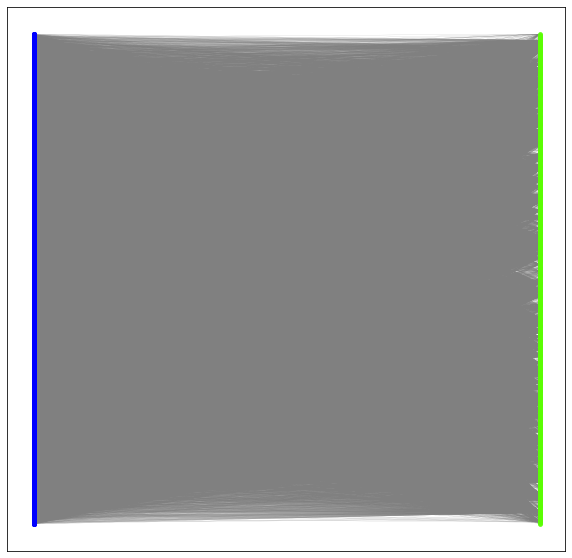

In [9]:
#BIPARTITE
plt.figure(figsize=(10,10))

top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)

nx.draw_networkx_nodes(B,pos,
                       nodelist=nodesrecipes,
                       node_color='b',
                       node_size=15,
                   alpha=0.8)

# Let's visualize the network
nx.draw_networkx_nodes(B,pos,
                       nodelist=nodesingredients,
                       node_color='#5AFE03',
                       node_size=15,
                   alpha=0.8)

# edges
nx.draw_networkx_edges(B,pos,edge_color='gray', width = 0.1)



#labels
#nx.draw_networkx_labels(B,pos,nodelist=nodesrecipes,font_size=15)
#nx.draw_networkx_labels(B,pos,nodelist=nodesingredients,font_size=0.0000001)


plt.show()

#plt.savefig("bipartitecumulative.jpg")
#delete the # below if you want to save the plot
#files.download("bipartitecumulative.jpg") 

#plt.savefig("/Users/juan/Dropbox/ACADEMICO/NYU PHD/Dissertation/paper3carrusel/Images/bipartitecumulative_tworecipes.png")
#delete the # below if you want to save the plot
#files.download("bipartitecumulative.jpg") 


#PROJECTED

##### 2. Projected  (Weighted and Weighted Using Backbone Extraction)

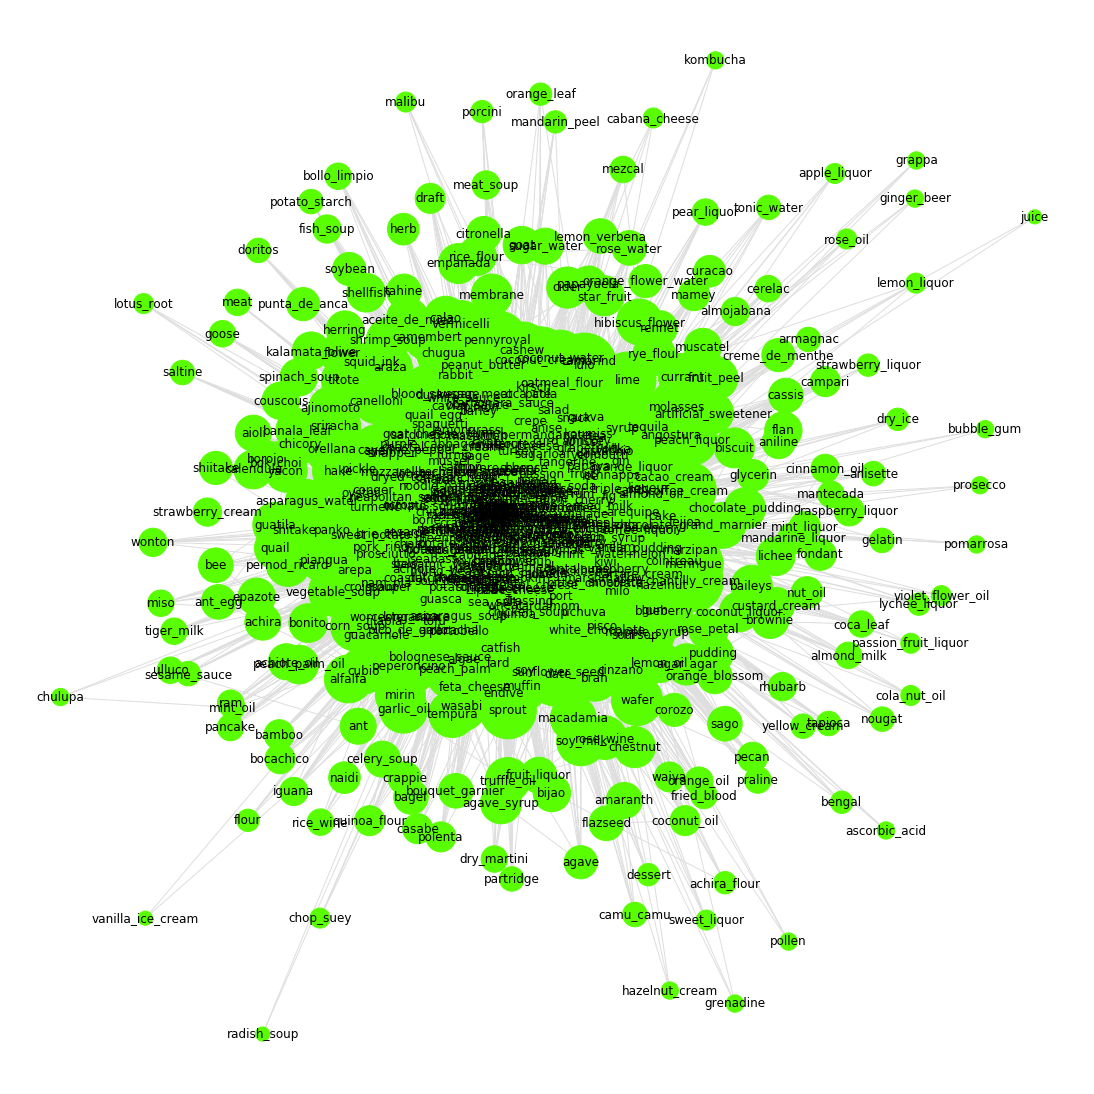

In [10]:
#projection into ingredient nodes
G = bipartite.weighted_projected_graph(B,nodesingredients)
#get the node degrees
d = dict(G.degree)


#export to Gefx
nx.write_gexf(G,"/Users/juan/Dropbox/ACADEMICO/NYU PHD/Dissertation/paper3carrusel/all_nodes_with_attr.gexf")


plt.figure(figsize=(15,15))

#pos = nx.spectral_layout(G)
pos = nx.spring_layout(G)
#pos = nx.shell_layout(G)
#pos = nx.kamada_kawai_layout(G)
#pos = nx.planar_layout(G)

nx.draw(G, pos = pos, 
        nodelist=d.keys(), 
        with_labels=True, 
        edge_color = '#DEDEDF', 
        node_color='#5AFE03',
        node_size=[v * 100 for v in d.values()])

#plt.savefig("bipartitenetwork.svg")
plt.show()

#delete the # below if you want to save the plot
#files.download("bipartitenetwork.svg") 

#print(nx.degree_histogram(G))

##### Ok, can we obtain better results if we extract the backbone of the network?

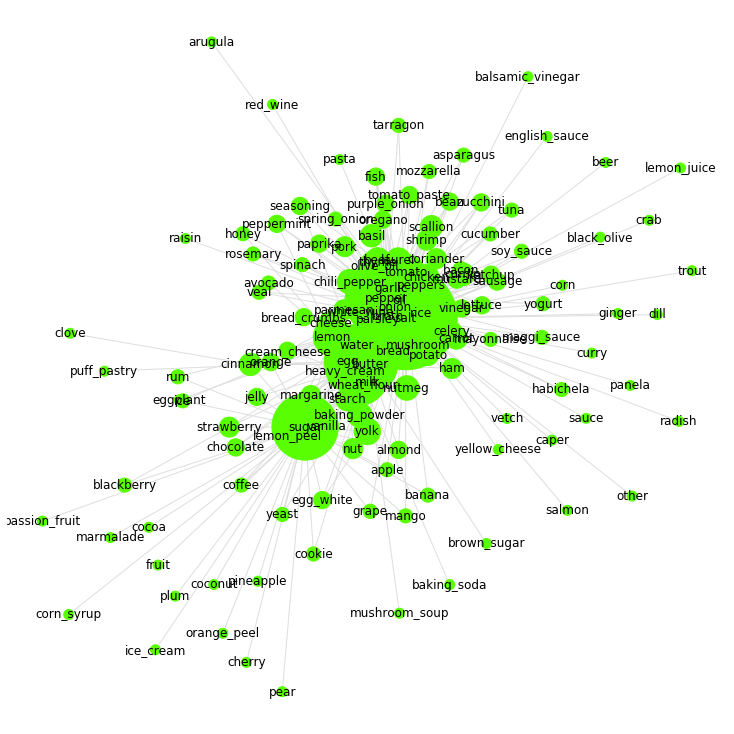

In [11]:

#The alpha parameter determines how much of the network is pruned. The lower the number the more pruning it does. Based on function defined above
nx.set_node_attributes(G, ingredient_category, 'category')
backbonell2 = nf.extract_backbone(G,0.0002)


##projection into ingredient nodes
#get the node degrees
d = dict(backbonell2.degree)

plt.figure(figsize=(10,10))

posBackBone = nx.spring_layout(backbonell2)


nx.draw(backbonell2, posBackBone, 
        nodelist=d.keys(), 
        with_labels=True, 
        edge_color = '#DEDEDF', 
        node_color='#5AFE03',
        node_size=[v * 100 for v in d.values()])

plt.show()

##### Ok, we can export this network to Gephy to obtain a better visualization

In [12]:
#nx.generate_gexf(G, encoding='utf-8', prettyprint=True, version='1.2draft')
#files.download(gefx, "togephy.gefx") 
#nx.generate_gexf(G, encoding='utf-8', prettyprint=True, version='1.2draft')

#from google.colab import files
#nx.set_node_attributes(backbonell2, ingredient_category, 'category')
#nx.write_gexf(backbonell2,"/Users/juan/Dropbox/ACADEMICO/NYU PHD/Dissertation/paper3carrusel/backbone.gexf")
#files.download("backbone.gexf") 


After manipulating the network in Gephy and Diagramming : ![caption](files/cross_sectional_diagram.png)

## 4. Describe/Characterize the Network

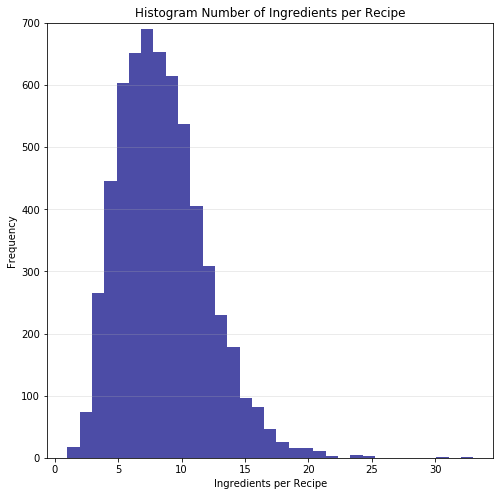

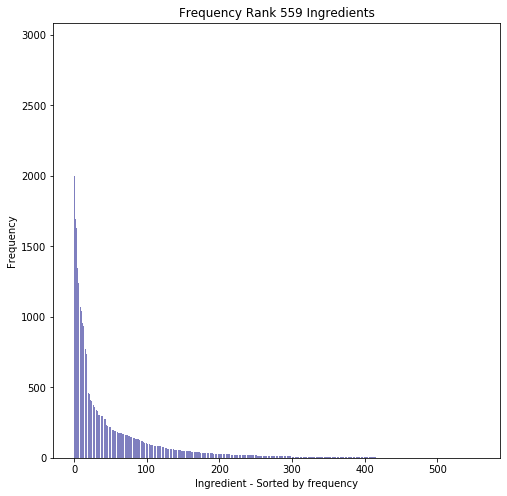

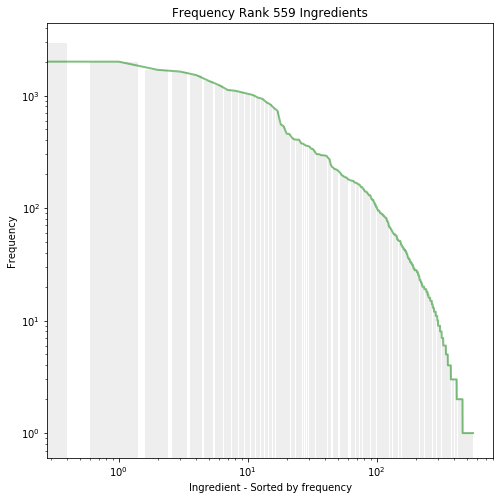

In [17]:
#Histogram (number of ingredients per recipe)

plt.figure(figsize=(8,8))

ingredients_p_recipe = carrusel_df.groupby('recipe_name').count().ingredient_en


# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=ingredients_p_recipe, bins=33, 
                            alpha=0.7, rwidth=10, color = 'navy')
plt.grid(axis='y', alpha=0.3)
plt.xlabel('Ingredients per Recipe')
plt.ylabel('Frequency')
plt.title('Histogram Number of Ingredients per Recipe')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.savefig("/Users/juan/Dropbox/ACADEMICO/NYU PHD/Dissertation/paper3carrusel/Images/histogramstatic.png")


#####

#Frequency rank normal


ingredient_freq_rank = carrusel_df['ingredient_en'].value_counts()
ingredient_freq_rank = pd.DataFrame(ingredient_freq_rank)

y_pos = np.arange(559)
plt.figure(figsize=(8,8))
s = 1
expected_zipf = [ingredient_freq_rank.sort_values(by='ingredient_en', ascending=False)['ingredient_en']for i in y_pos]


plt.bar(y_pos, ingredient_freq_rank.sort_values(by='ingredient_en', ascending=False)['ingredient_en'][:559], align='center', alpha=0.5, color='navy')

#plt.plot(y_pos, ingredient_freq_rank.sort_values(by='ingredient_en', ascending=False)['ingredient_en'][:559], color='limegreen',linewidth=2,alpha=0.5)

#plt.plot(y_pos, expected_zipf, color='g',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Ingredient - Sorted by frequency')
plt.title('Frequency Rank 559 Ingredients')


plt.savefig("/Users/juan/Dropbox/ACADEMICO/NYU PHD/Dissertation/paper3carrusel/Images/frec_rank_static.png")



#####

#Frequency rank Logarithmic

ingredient_freq_rank = carrusel_df['ingredient_en'].value_counts()
ingredient_freq_rank = pd.DataFrame(ingredient_freq_rank)

y_pos = np.arange(559)
plt.figure(figsize=(8,8))
s = 1
expected_zipf = [ingredient_freq_rank.sort_values(by='ingredient_en', ascending=False)['ingredient_en'][0]/(i+1)**s for i in y_pos]
plt.yscale('log')
plt.xscale('log')

plt.bar(y_pos, ingredient_freq_rank.sort_values(by='ingredient_en', ascending=False)['ingredient_en'][:559], align='center', alpha=0.5, color='#DEDEDF')

plt.plot(y_pos, ingredient_freq_rank.sort_values(by='ingredient_en', ascending=False)['ingredient_en'][:559], color='g',linewidth=2,alpha=0.5)

#plt.plot(y_pos, expected_zipf, color='g',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Ingredient - Sorted by frequency')
plt.title('Frequency Rank 559 Ingredients')

plt.show()
#plt.savefig("/Users/juan/Dropbox/ACADEMICO/NYU PHD/Dissertation/paper3carrusel/Images/frec_rank_static_log.png")

#### Now, let's see which nodes and edges are the most important


In [15]:
df = pd.DataFrame (nf.top_ten_edges(G,10),columns=['Ingredient_1', 'Ingredient_2', 'Edge_Weight'])
#extract weight
weight = []
for x in range(0,len(df['Edge_Weight'])): weight.append(df['Edge_Weight'][x]['weight'])
df['Edge_Weight'] = weight
#get degree centrality
df['Top_10_Degree_Centrality'] = pd.DataFrame (nf.top_ten_deg_cent(G,10))
#get pagerank
df['Top_10_Pagerank'] = pd.DataFrame (nf.top_ten_pagerank(G,10))
df

,Ingredient_1,Ingredient_2,Edge_Weight,Top_10_Degree_Centrality,Top_10_Pagerank
0,salt,pepper,1748,salt,salt
1,salt,onion,969,water,pepper
2,salt,butter,964,sugar,onion
3,pepper,onion,820,pepper,butter
4,salt,egg,731,butter,sugar
5,salt,garlic,722,egg,egg
6,salt,oil,700,lemon,water
7,pepper,butter,639,heavy_cream,garlic
8,salt,wheat_flour,617,garlic,oil
9,pepper,garlic,609,onion,lemon


### Commuity Detectionn Algorithms (not used in the paper)

In [16]:
import cpalgorithm as cp
import networkx as nx

algorithm = cp.Surprise()
algorithm.detect(G)
c = algorithm.get_pair_id()
x = algorithm.get_coreness()

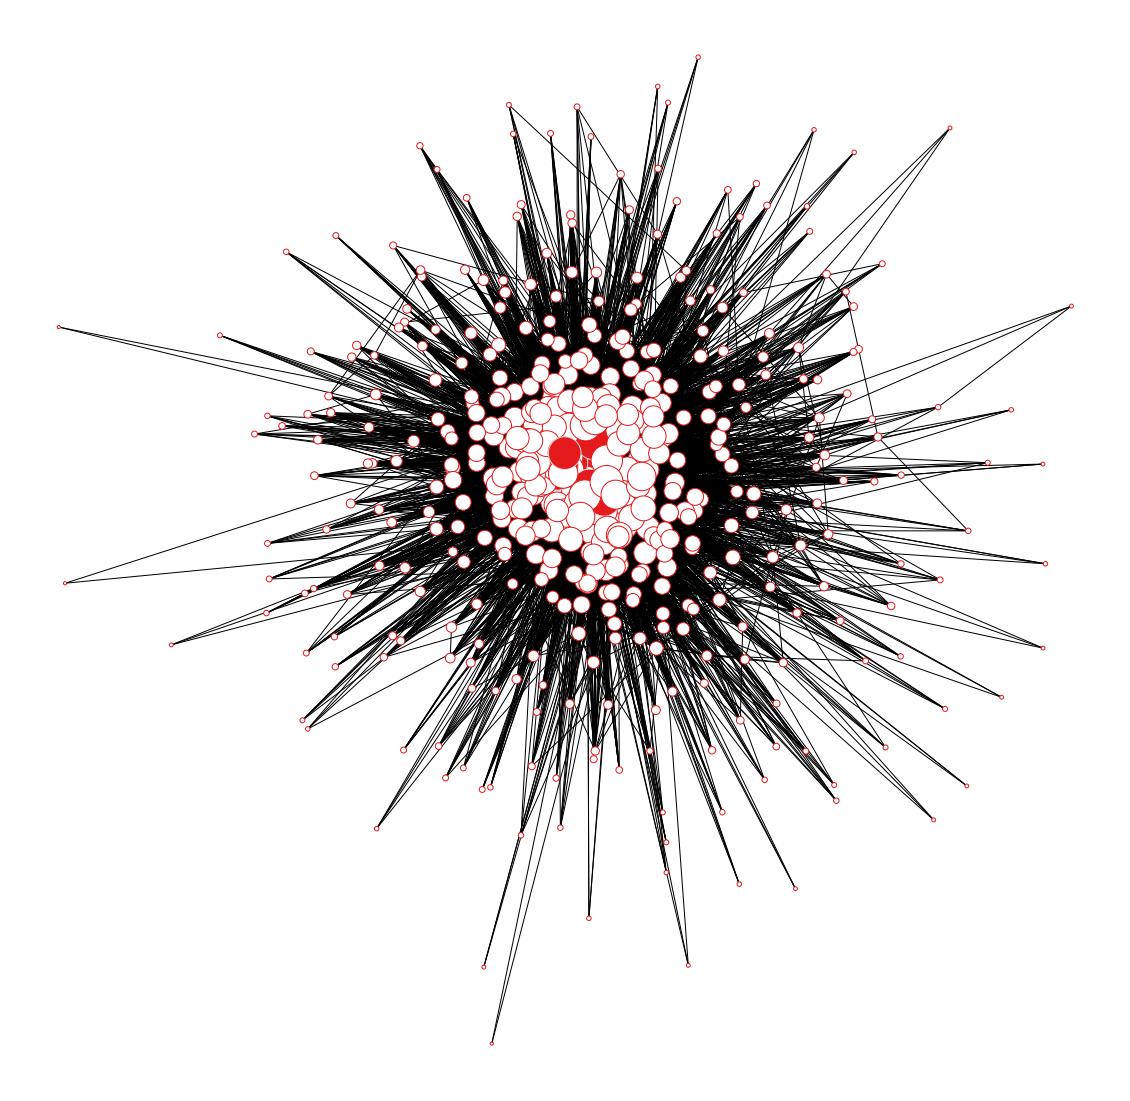

In [17]:
import matplotlib.pyplot as plt
#Plot size
plt.figure(3,figsize=(20,20))

cmap = plt.cm.get_cmap('Set1')
#positions LAYOUT
pos = nx.spring_layout(G)
#pos = nx.circular_layout(G)
#pos = nx.kamada_kawai_layout(G)
#pos = nx.random_layout(G)
#pos = nx.rescale_layout(G)
#pos = nx.shell_layout(G)
#pos = nx.spring_layout(G)
#pos = nx.spectral_layout(G)
#pos = nx.spiral_layout(G)
#pos = nx.multipartite_layout(G)


#Colors and edges and labels (based on the centrality algorithm)
node_colors = [cmap(c[d]) if x[d] ==1 else "white" for d in G.nodes()]
node_edge_colors = [cmap(c[d]) if x[d] ==0 else "#DEDEDF" for d in G.nodes()]
#node_labels = [d for d in G.nodes()]
d = dict(G.degree)

nodes = nx.draw_networkx_nodes(G, 
                               pos,  
                               node_color = node_colors, 
                               linewidths=1, 
                               node_size=[v * 5 for v in d.values()]
                              )
nodes.set_edgecolor(node_edge_colors)
nx.draw_networkx_edges(G, pos)
#nx.draw_networkx_labels(G, pos)


plt.gca().axis('off')
plt.show()
#plt.savefig("/Users/juan/Dropbox/ACADEMICO/NYU PHD/Dissertation/paper3carrusel/Images/core_periphery_Minres_Algo.png")

In [18]:
core = [key  for (key, value) in x.items() if value == 1]
print(len(core))
print(len(x))
print(core)
#print(x)

51
559
['potato', 'carrot', 'vetch', 'mayonnaise', 'salt', 'pepper', 'egg', 'parsley', 'rice', 'onion', 'garlic', 'peppers', 'butter', 'oil', 'heavy_cream', 'chicken', 'tomato', 'celery', 'lemon', 'olive_oil', 'wheat_flour', 'beef', 'scallion', 'chili_pepper', 'bacon', 'parmesan', 'laurel', 'pork', 'thyme', 'starch', 'broth', 'milk', 'white_wine', 'sugar', 'vinegar', 'water', 'mushroom', 'oregano', 'lettuce', 'cheese', 'orange', 'bread', 'shrimp', 'mustard', 'spring_onion', 'vanilla', 'coriander', 'cinnamon', 'nutmeg', 'ham', 'basil']


78
128
204
56
56
246
51
91
457


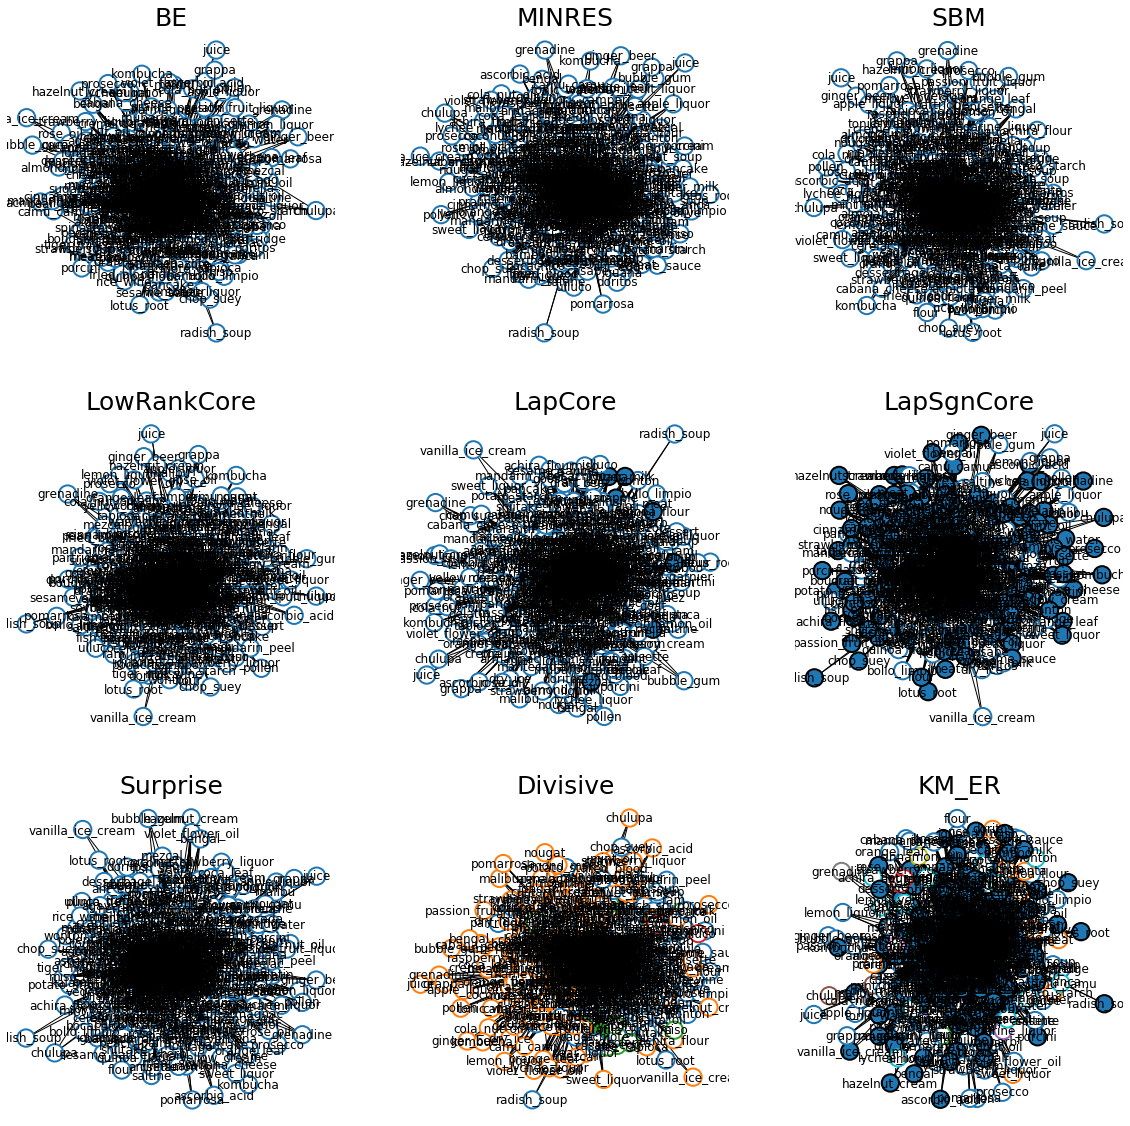

In [19]:
def plot_graph(c, x, ax, name, pos = None):

    cmap = plt.cm.get_cmap('tab10')
    if pos is None:
        pos = nx.spring_layout(G)
    node_colors = [ cmap(c[d]) if x[d] ==1 else "white" for d in G.nodes()]
    node_edge_colors = [ cmap(c[d]) if x[d] ==0 else "black" for d in G.nodes()]
    node_labels = [d for d in G.nodes()]

    nodes = nx.draw_networkx_nodes(G, pos,  node_color = node_colors, linewidths=2, ax=ax)
    nodes.set_edgecolor(node_edge_colors)
    nx.draw_networkx_edges(G, pos, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax)
    ax.set_title(name, fontsize = 25)
    ax.axis('off')

algorithms = [
    cp.BE(),
    cp.MINRES(),
    cp.SBM(),
    cp.LowRankCore(),
    cp.LapCore(),
    cp.LapSgnCore(),
    cp.Surprise(),
    cp.Divisive(),
    cp.KM_ER()
]

algorithm_names = [
    "BE", "MINRES", "SBM", "LowRankCore", "LapCore", "LapSgnCore", "Surprise", "Divisive", "KM_ER"
]

pos = None
figs, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 20))
for i, algorithm in enumerate(algorithms):

    algorithm.detect(G)

    c = algorithm.get_pair_id()
    x = algorithm.get_coreness()
    #Juan's Mod
    core = [key  for (key, value) in x.items() if value == 1]
    print(len(core))
    #Ends Juan's Mod
    
    

    plot_graph(c, x, axes.flat[i], name = algorithm_names[i], pos=pos)

plt.show()